In [2]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [3]:
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}"


## We will be using the code of the previously charted graph as below:
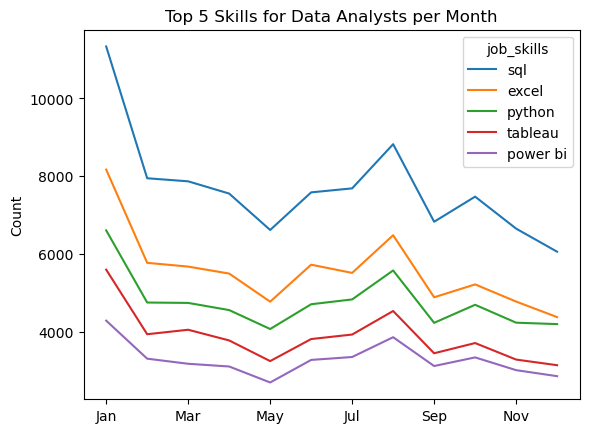

In [4]:
# code: Month vs Job Skills

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA['job_posted_month'] = df_DA['job_posted_date'].dt.month

df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index= 'job_posted_month', columns= 'job_skills', fill_value=0, aggfunc='size')

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending= False).index] # acc to LB
# this works too: df_DA_pivot = df_DA_pivot.sort_values(by= 'Total', ascending= False, axis=1)
df_DA_pivot = df_DA_pivot.drop('Total')

# df_DA_pivot.iloc[:, :5].plot(kind = 'line')

df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')

df_DA_pivot.iloc[:, :5]

job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
Jan,11336,8170,6606,5596,4285
Feb,7947,5772,4751,3936,3307
Mar,7868,5675,4741,4051,3176
Apr,7553,5496,4557,3776,3106
May,6617,4773,4070,3245,2695
Jun,7584,5724,4707,3812,3275
Jul,7687,5513,4831,3928,3350
Aug,8823,6482,5576,4533,3859
Sep,6829,4886,4229,3446,3118


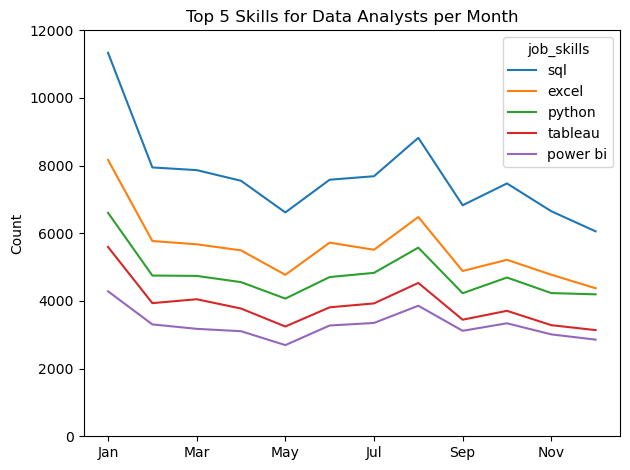

In [5]:
df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills for Data Analysts per Month')
plt.xlabel('')
plt.ylabel('Count')
plt.ylim(0,12000)
plt.tight_layout() # not necessary here
plt.show()

## Insights from the Line Chart:

This graph illustrates the monthly trends in the top 5 skills required for Data Analysts over the course of a year. Here's an analysis based on the visual trends:

1. **SQL**:
   - SQL is consistently the most demanded skill throughout the year, peaking at the beginning of the year (January) with around 12,000 mentions.
   - There is a noticeable decline after January, with minor fluctuations, showing an overall downward trend as the year progresses.

2. **Excel**:
   - Excel is the second most demanded skill. It follows a similar trend to SQL, starting high in January and gradually declining over the year.
   - There is a slight resurgence around mid-year (June-August) before continuing its downward trend.

3. **Python**:
   - Python demand remains relatively stable compared to SQL and Excel, starting with a moderate demand in January.
   - Like Excel, it shows a small increase around mid-year but does not reach the same peaks as SQL or Excel.

4. **Tableau**:
   - Tableau is consistently in the lower tier of these top 5 skills, with the demand hovering around 4,000 to 5,000 mentions.
   - The trend is relatively flat, with minor fluctuations but no significant spikes or drops.

5. **Power BI**:
   - Power BI has the least demand among the top 5 skills. The trend shows a steady and consistent demand throughout the year, similar to Tableau.
   - There is a slight increase around the mid-year but remains lower compared to other skills.

### Key Insights:
- **SQL and Excel**: These two skills are in high demand, but their demand decreases slightly as the year progresses. SQL, in particular, sees a significant drop after January, indicating possible seasonality or a shift in focus to other skills.
  
- **Python**: Python remains stable, suggesting it's a consistently important skill, though not as dominant as SQL or Excel.

- **Tableau and Power BI**: These visualization tools, while important, are less in demand compared to the programming and data manipulation skills like SQL, Excel, and Python.

- **Seasonal Variations**: There is a general decline in demand for all skills towards the end of the year, which could indicate fewer job postings or less hiring activity during these months.

This analysis suggests that while foundational skills like SQL and Excel are critical, there's a steady demand for Python and visualization tools like Tableau and Power BI. Aspiring Data Analysts should focus on SQL and Excel while also building competency in Python and at least one visualization tool.

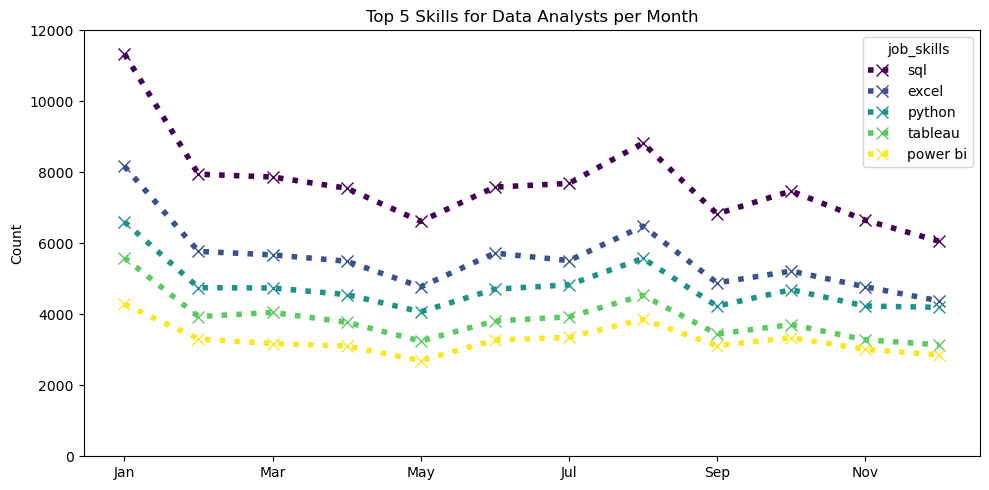

In [6]:
# Customizing the above chart:

df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth= 4,
    linestyle= ':', # options: '-', '--', '-.', ':'
    colormap= 'viridis', # options: 'viridis', 'plasma', 'inferno;, 'magma', 'cividis'; more in cheatsheet
    marker= 'x', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    markersize= 8,
    figsize= (10,5)
)
plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.ylim(0,12000)
plt.tight_layout()
plt.show()

## Scatter Plots

In [15]:
# Explode the 'job_skills' into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg' , 'median'),
    skill_count = ('job_skills' , 'count')
    
)

skill_stats

,median_salary,skill_count
job_skills,,
airflow,111175.0,2002
airtable,90000.0,88
alteryx,105000.0,4570
angular,109101.0,376
angular.js,NaN,2
...,...,...
wrike,75000.0,39
wsl,NaN,16
xamarin,NaN,2


In [16]:
# Limit to the top skills

skill_count = 20
skill_stats = skill_stats.sort_values(by= 'skill_count', ascending= False).head(skill_count)
skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


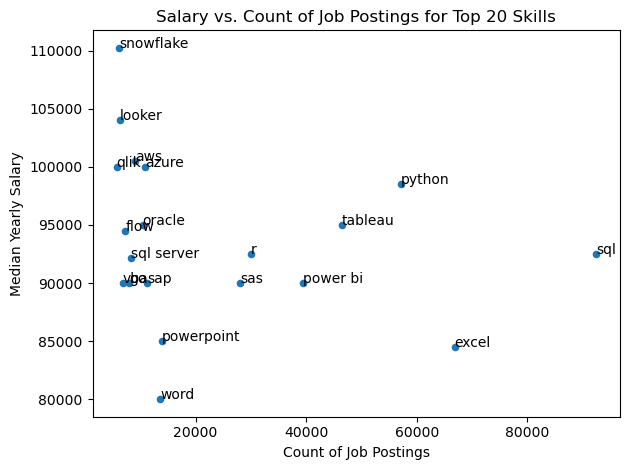

In [21]:
# Plot the scatter plot

skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.tight_layout()
plt.show()

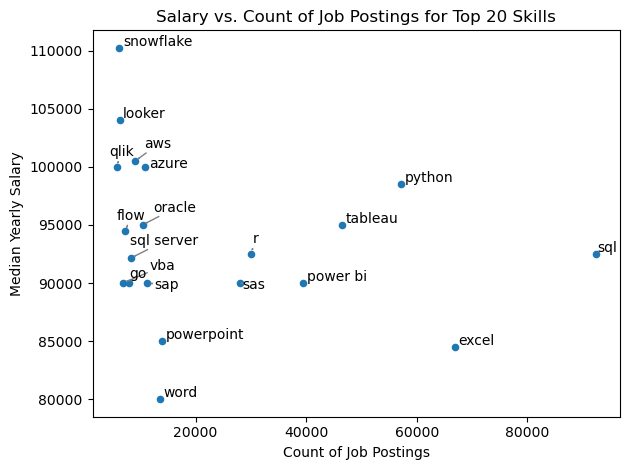

In [28]:
# adjusttext.readthedocs.io

from adjustText import adjust_text

# copying code from above:

skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.tight_layout()
plt.show()

# looks good but let's include arrows to avoid confusion
# arrowprops=dict(arrowstyle="->", color='r', lw=0.5)


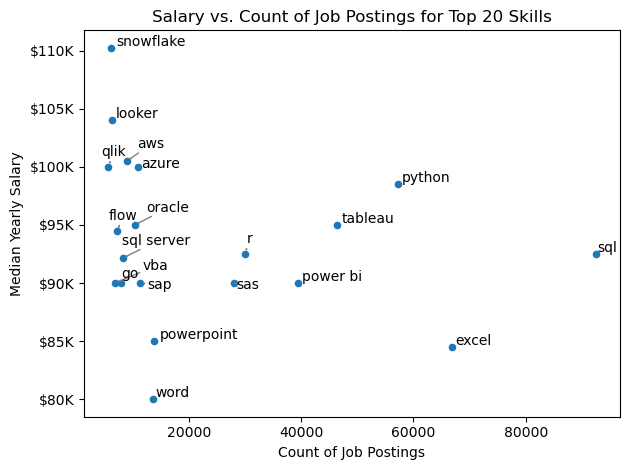

In [31]:
# now to customize the y-axis
# we can use ax, fig = plt.subplots or plt.gca()
from adjustText import adjust_text

# ax, fig = plt.subplots()
# plt.gca() needs to be placed after the scatter plot code and adjust_texts else blank graph

skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.tight_layout()
plt.show()